# Initial analysis and data preprocessing 

This analysis is based on data for city bikes in Toronto, Canada for 2018.

Bike Share Toronto: https://bikesharetoronto.com/

Data source: https://www.kaggle.com/jackywang529/toronto-bikeshare-data [10.02.2020]

The purpose of the following analysis is to present possible analysis techniques and examples of conclusions that can be used to, among others improving the supply offered to optimize the number of bicycles made available to customers and improve the company's profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
%matplotlib inline

The data is divided into quarters. The whole year 2018 will be taken into account in this analysis, so the data is merged into one table.

In [2]:
df1 = pd.read_csv('Bike Share Toronto Ridership_Q1 2018.csv', low_memory=False)
df2 = pd.read_csv('Bike Share Toronto Ridership_Q2 2018.csv', low_memory=False)
df3 = pd.read_csv('Bike Share Toronto Ridership_Q3 2018.csv', low_memory=False)
df4 = pd.read_csv('Bike Share Toronto Ridership_Q4 2018.csv', low_memory=False)

df = pd.concat([df1, df2, df3, df4], axis=0)
df.set_index('trip_id', inplace=True)

In [3]:
df.head()

,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
trip_id,,,,,,,,
2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [4]:
df.shape

(1922955, 8)

In [5]:
df.isnull().sum()

trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [6]:
df.nunique()

trip_duration_seconds     17609
from_station_id             359
trip_start_time          366574
from_station_name           359
trip_stop_time           366328
to_station_id               359
to_station_name             359
user_type                     2
dtype: int64

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922955 entries, 2383648 to 4581277
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   trip_duration_seconds  int64 
 1   from_station_id        int64 
 2   trip_start_time        object
 3   from_station_name      object
 4   trip_stop_time         object
 5   to_station_id          int64 
 6   to_station_name        object
 7   user_type              object
dtypes: int64(3), object(5)
memory usage: 758.3 MB


The dataframe contains 1,922,955 rows and 8 columns:

- index - unique journey identifier
- trip_duration_seconds - time of travel
from_station_id
- from_station_id/to_station_id - 'start' and 'end' station by identifier
- from_station_name/to_station_name - 'start' and 'end' station by name
- trip_start_time/trip_stop_time - 'start' and 'end' date and time
- user_type - indication whether the user pays the subscription



Preliminary analysis does not indicate that the data is incomplete. However, it should be pointed out that the memory usage is relatively high (758 MB) - the type of data of some of the columns should be changed (e.g. date and time of the start and the end of rides from ‘string’ (‘object’) to ‘datetime’).
It is worth mentioning that some of the columns operate only on a small number of unique entires, which suggests changing their dtypes to ‘category’.



In [8]:
df['user_type'] = df['user_type'].astype('category')

df['from_station_name'] = df['from_station_name'].astype('category')
df['to_station_name'] = df['to_station_name'].astype('category')

df['from_station_id'] = df['from_station_id'].astype('category')
df['to_station_id'] = df['to_station_id'].astype('category')

In [9]:
df['trip_start_time'] = df['trip_start_time'].astype('datetime64[ns]')
df['trip_stop_time'] = df['trip_stop_time'].astype('datetime64[ns]')

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922955 entries, 2383648 to 4581277
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trip_duration_seconds  int64         
 1   from_station_id        category      
 2   trip_start_time        datetime64[ns]
 3   from_station_name      category      
 4   trip_stop_time         datetime64[ns]
 5   to_station_id          category      
 6   to_station_name        category      
 7   user_type              category      
dtypes: category(5), datetime64[ns](2), int64(1)
memory usage: 75.3 MB


Optimizing data types has reduced memory consumption by a factor of ten.

# Annual / casual members

First, the breakdown into rides that were made by those paying for the subscription and those who rented bicycles on a short-term basis will be analyzed.

In [11]:
members = df['user_type'].value_counts()

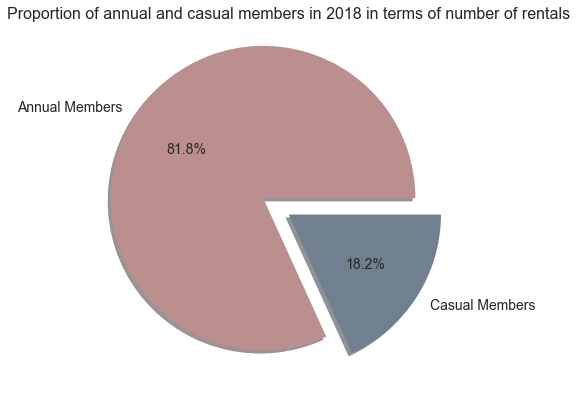

In [12]:
plt.style.use('seaborn') #set seaborn style for graphs in this analysis

members.plot(kind='pie', figsize=(7,7), autopct='%.1f%%', fontsize=14, legend=False,
             colors=['rosybrown', 'slategrey'], explode=(0.2,0), 
            shadow=True, labels=['Annual Members', 'Casual Members'])

plt.title('Proportion of annual and casual members in 2018 in terms of number of rentals', 
          fontdict={'fontsize':16})
plt.axis('off')
plt.show()

Throughout the year, the breakdown is as in the chart above. However, it is possible that the participation of individual groups varies depending on the period.

In [13]:
#creating bins weekly for grouping and cutting data
weekly_bins = pd.date_range('2017-12-31', '2018-12-31', freq='W')

#creating pivot table to find the number of rentals depending of type of user
by_member = df.pivot_table(index=pd.cut(df['trip_start_time'], weekly_bins), 
               columns='user_type', aggfunc='count', values='to_station_id')

by_member.head()

user_type,Annual Member,Casual Member
trip_start_time,,
"(2017-12-31, 2018-01-07]",4660,83
"(2018-01-07, 2018-01-14]",8199,178
"(2018-01-14, 2018-01-21]",10344,281
"(2018-01-21, 2018-01-28]",13391,574
"(2018-01-28, 2018-02-04]",10546,375


In [14]:
#changing absolute numbers to their shares 
for index, row in by_member.iterrows():
    suma = row[0] + row[1]
    by_member.loc[index, 'Annual Member'] = round(row[0] / suma, 3)
    by_member.loc[index, 'Casual Member'] = round(row[1] / suma, 3)

by_member.head()

user_type,Annual Member,Casual Member
trip_start_time,,
"(2017-12-31, 2018-01-07]",0.983,0.017
"(2018-01-07, 2018-01-14]",0.979,0.021
"(2018-01-14, 2018-01-21]",0.974,0.026
"(2018-01-21, 2018-01-28]",0.959,0.041
"(2018-01-28, 2018-02-04]",0.966,0.034


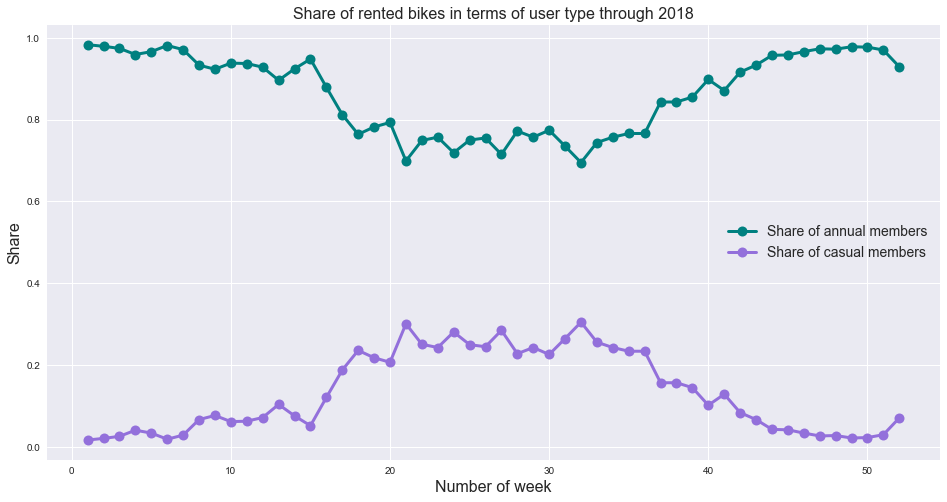

In [15]:
plt.figure(figsize=(16,8))
xticks = range(1, len(by_member.index)+1) 

#create plots for annual and casual members
plt.plot(xticks, by_member['Annual Member'], '-o', lw=3, color='teal',
         markersize=10, label='Share of annual members')
plt.plot(xticks, by_member['Casual Member'], '-o', lw=3, color='mediumpurple',
         markersize=10, label='Share of casual members') 

plt.xlabel('Number of week', fontdict={'fontsize':16})
plt.ylabel('Share', fontdict={'fontsize':16})
plt.title('Share of rented bikes in terms of user type through 2018', fontdict={'fontsize':16})
plt.legend(prop={'size':14})
plt.show()

The chart shows that in the autumn, winter and early spring periods, those paying the annual subscription account for about 90% of all rides. In summer, probably due to higher temperature, the proportion of these people decreases in favor of casual riders.

# Ride times

Another thing to analyze is the ride time, i.e. the difference between the time of renting the bike and returning it.

In [16]:
#filter for 30-minutes rides
half_hour = df['trip_duration_seconds'] > 30 * 60

total_time = datetime.timedelta(seconds=int(df['trip_duration_seconds'].sum()))
more_than_30 = datetime.timedelta(seconds=int(df[half_hour]['trip_duration_seconds'].sum()))

print('Total time:\t\t', total_time)
print('Time above 30 min:\t', more_than_30)

Total time:		 21432 days, 9:39:08
Time above 30 min:	 6553 days, 18:31:47


The sum of the time for which the bikes were borrowed is 21,432 days, i.e. about 59.5 years. 

Based on the duration of the loan, it is possible to partially estimate the company's revenues. There is no data on the number of people paying the subscription, but one can calculate the amount that is due for keeping the bike more than half hour - in both cases, i.e. in the case of an annual subscription, as well as in the case of casual riders, the price includes only the first 30 minutes of riding - each subsequent started half an hour costs the user $ 4.

In [17]:
#to find out the revenue I divide each time by 30-minutes intervals 
#and subtract 1 (for first free 30-minute ride)
exceeded = df['trip_duration_seconds'] / (30 * 60) - 1

#rounding up and summing
income = exceeded.apply(lambda x: math.ceil(x)).sum() * 4
print('Based solely on overage fees, BikeShare earned {} $.'.format(income))

Based solely on overage fees, BikeShare earned 1085100 $.


In [18]:
#average rental time
mean_time = datetime.timedelta(seconds=int(df['trip_duration_seconds'].mean()))
median = datetime.timedelta(seconds=int(df['trip_duration_seconds'].median()))
print('Mean time in seconds is {}, which means {}.'.format(mean_time.seconds, str(mean_time)))
print('Median time in seconds is {}, which means {}.'.format(median.seconds, str(median)))

Mean time in seconds is 962, which means 0:16:02.
Median time in seconds is 670, which means 0:11:10.


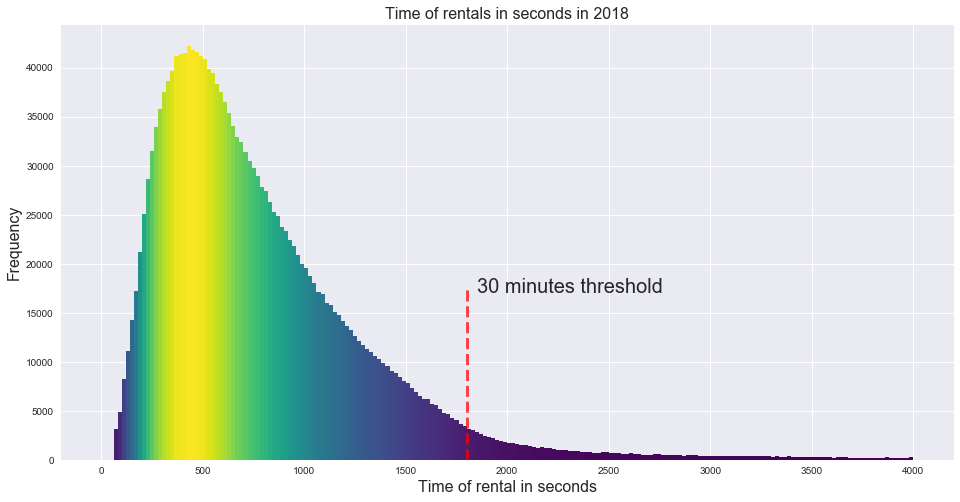

In [19]:
time_bins = np.linspace(0, 4000, 201)
plt.figure(figsize=(16,8))

#set colormap for nice visualization
cm = plt.cm.get_cmap('viridis')

n, bins, patches = plt.hist(df['trip_duration_seconds'], time_bins)

#loop to get diffrent color for each bar of the histogram
col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

#plotting additional comment with extra line
plt.plot([30*60, 30*60], [0, 17500], 'r--', lw=3, alpha=0.7)
plt.annotate('30 minutes threshold', xy=(1850,17000), size=20)

plt.xlabel('Time of rental in seconds', fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':16})
plt.title('Time of rentals in seconds in 2018', fontdict={'fontsize':16})
plt.show()

The histogram presents values indicating the time of renting a bike. It can be seen that although the average rental time is 962 seconds, the most people rented bikes for about 450 seconds (7.5 minutes). What's more, compared to all rides, rides exceeding 30 minutes are a very small part, and as extreme values cause a significant deviation of the average.

# Day and time

Another thing is to analyze bike rentals depending on the day and time. Let's start by checking how rentals varies through the year.

In [20]:
#creating daily bins to cut and group data
daily_bins = pd.date_range('2018-01-01', '2018-12-31', freq='D')

In [21]:
daily_rentals = df.groupby(by=pd.cut(df['trip_start_time'], daily_bins, 
                                  right=False))['user_type'].count()
daily_rentals

trip_start_time
[2018-01-01, 2018-01-02)     246
[2018-01-02, 2018-01-03)     957
[2018-01-03, 2018-01-04)    1185
[2018-01-04, 2018-01-05)    1172
[2018-01-05, 2018-01-06)     785
                            ... 
[2018-12-26, 2018-12-27)    1147
[2018-12-27, 2018-12-28)    1743
[2018-12-28, 2018-12-29)    2306
[2018-12-29, 2018-12-30)    1343
[2018-12-30, 2018-12-31)    1135
Name: user_type, Length: 364, dtype: int64

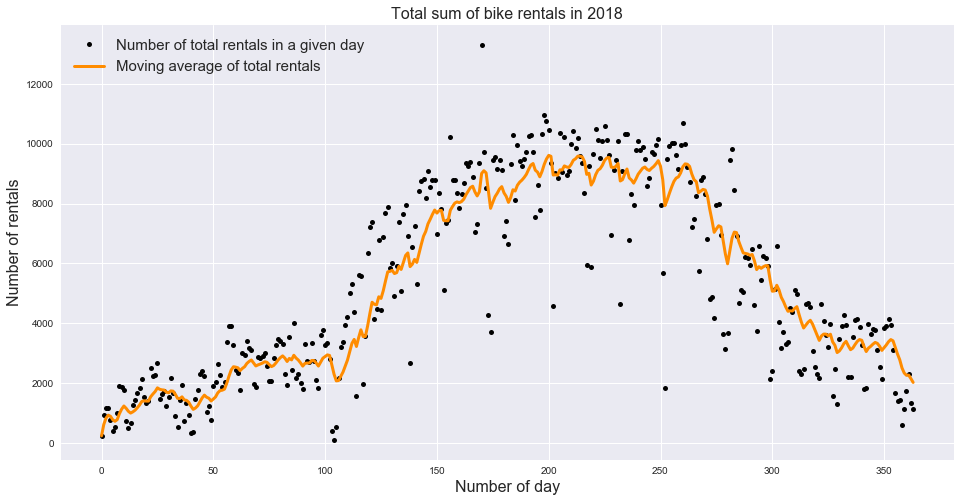

In [22]:
xticks=range(len(daily_rentals.index))
plt.figure(figsize=(16,8))

plt.plot(xticks, daily_rentals, 'o', markersize=5, color='black',
         label='Number of total rentals in a given day')
plt.plot(xticks, daily_rentals.ewm(7).mean(), lw=3, color='darkorange',
         label='Moving average of total rentals')

plt.title('Total sum of bike rentals in 2018', fontdict={'fontsize':16})
plt.xlabel('Number of day', fontdict={'fontsize':16})
plt.ylabel('Number of rentals', fontdict={'fontsize':16})
plt.legend(prop={'size':15}, loc='upper left')
plt.show()

The above chart shows the sum of rentals each day throughout the year. As you can see from the 7-day average line, most people use Bike Share in the summer. Interestingly, however, even in winter months, the values may reach up to 4000 rentals per day.

Below the same grapth will be plotted, but this time broken down by user type.

In [23]:
daily_rentals_user = df.pivot_table(index=pd.cut(df['trip_start_time'], daily_bins, right=False), 
                               columns='user_type', aggfunc='count', values='trip_stop_time')
daily_rentals_user.tail()

user_type,Annual Member,Casual Member
trip_start_time,,
"[2018-12-26, 2018-12-27)",1025,122
"[2018-12-27, 2018-12-28)",1684,59
"[2018-12-28, 2018-12-29)",2122,184
"[2018-12-29, 2018-12-30)",1271,72
"[2018-12-30, 2018-12-31)",1060,75


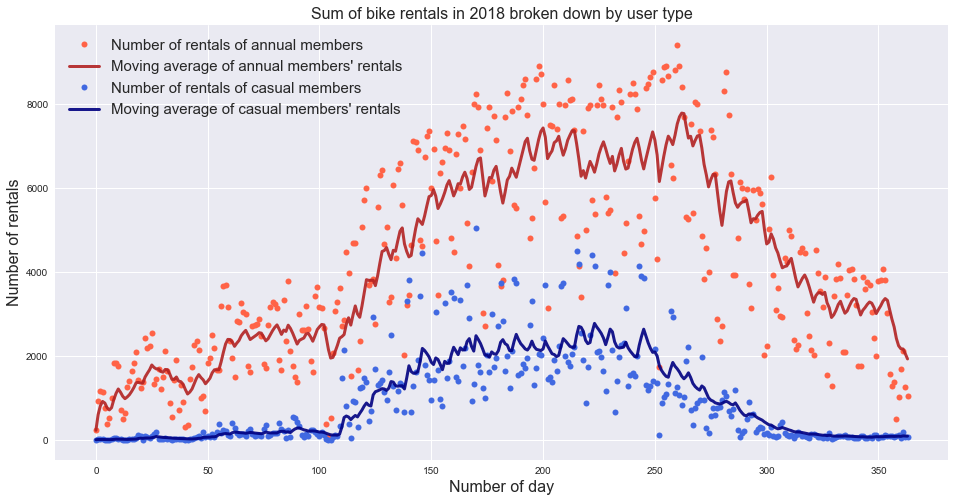

In [24]:
xticks=range(len(daily_rentals_user.index))
plt.figure(figsize=(16,8))

plt.plot(xticks, daily_rentals_user['Annual Member'], 'o', markersize=6, color='tomato',
         label='Number of rentals of annual members')
plt.plot(xticks, daily_rentals_user['Annual Member'].ewm(7).mean(), lw=3, color='firebrick',
         label="Moving average of annual members' rentals", alpha=.9)

plt.plot(xticks, daily_rentals_user['Casual Member'], 'o', markersize=6, color='royalblue',
         label='Number of rentals of casual members')
plt.plot(xticks, daily_rentals_user['Casual Member'].ewm(7).mean(), lw=3, color='navy',
         label="Moving average of casual members' rentals", alpha=.9)

plt.title('Sum of bike rentals in 2018 broken down by user type', fontdict={'fontsize':16})
plt.xlabel('Number of day', fontdict={'fontsize':16})
plt.ylabel('Number of rentals', fontdict={'fontsize':16})
plt.legend(prop={'size':15})
plt.show()

The above confirms that mainly participants having a subscription for their rental are responsible for the sum of rentals. This has the greatest impact especially in the winter months, when the number of rentals by casual users is close to zero.

Now, an analysis will be performed based on the days of the week.

In [25]:
#creating additional category (even though I do not need to) 
#to get name of days in correct order on next plots
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#adding new column to the original dataset indicating the name of the day
df['day'] = df['trip_start_time'].dt.day_name()
df['day'] = pd.Categorical(df['day'], categories=day_names, ordered=True)

Another thing is to check how the values change depending on the day of the week. 

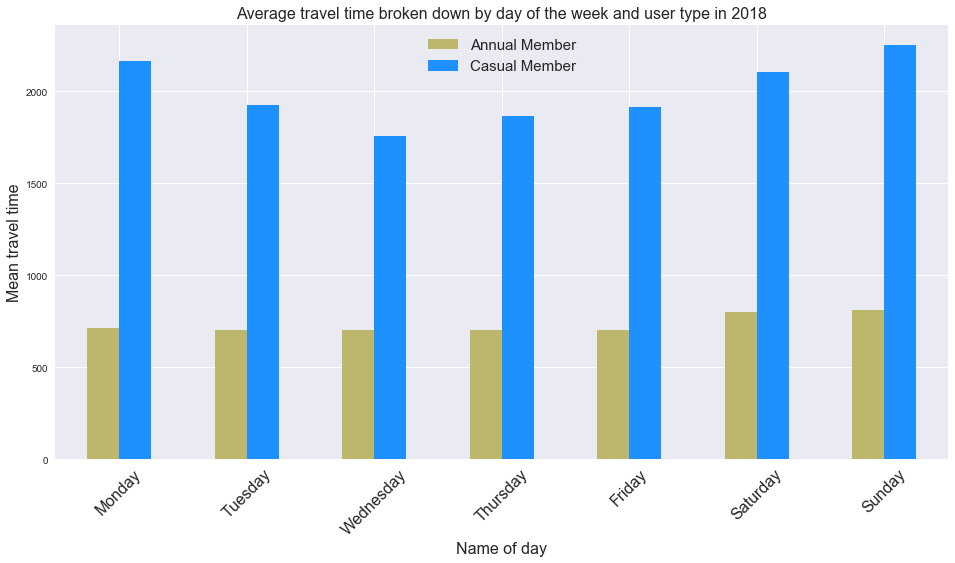

In [26]:
#creating groupby object that calculate the mean travel time based 
#on day of the week and user type
time_grouped = df.groupby(['day', 'user_type'])['trip_duration_seconds'].mean()

#unstacking data with multiindex to get barplot with two bars for each day
time_grouped.unstack().plot(kind='bar', figsize=(16,8), color=['darkkhaki', 'dodgerblue'])

plt.legend(loc='best', prop={'size':15})
plt.title('Average travel time broken down by day of the week and user type in 2018',
          fontdict={'fontsize':16})
plt.xlabel('Name of day', fontdict={'fontsize':16})
plt.ylabel('Mean travel time', fontdict={'fontsize':16})
plt.xticks(size=16, rotation=45)
plt.show()

As for the travel time itself, in the case of subscribers, the time does not differ significantly depending on the day of the week. However, for casual members, the average ride time is about twice as high in the middle of the week and almost three times on weekends and Mondays.

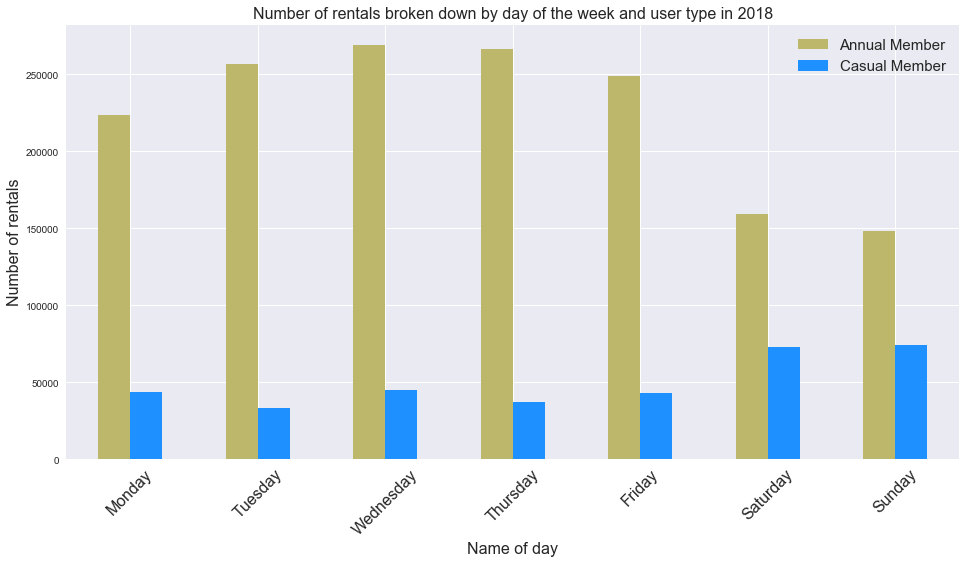

In [27]:
#creating groupby object that sums the number of rides based 
#on day of the week and user type
rentals_grouped = df.groupby(['day', 'user_type'])['user_type'].count()
rentals_grouped.unstack().plot(kind='bar', figsize=(16,8), color=['darkkhaki', 'dodgerblue'])

plt.legend(loc='best', prop={'size':15})
plt.title('Number of rentals broken down by day of the week and user type in 2018',
          fontdict={'fontsize':16})
plt.xlabel('Name of day', fontdict={'fontsize':16})
plt.ylabel('Number of rentals', fontdict={'fontsize':16})
plt.xticks(size=16, rotation=45)
plt.show()

In the case of the number of rentals, the numbers are completely different - subscribers (annual members) have a much more significant mean number. Moreover, this number drops significantly on weekends, suggesting that those people use bikes mainly to travel to and from work.

In [28]:
#adding new column to the original dataset indicating the hour of the beggining of each ride
df['hour'] = df['trip_start_time'].dt.hour

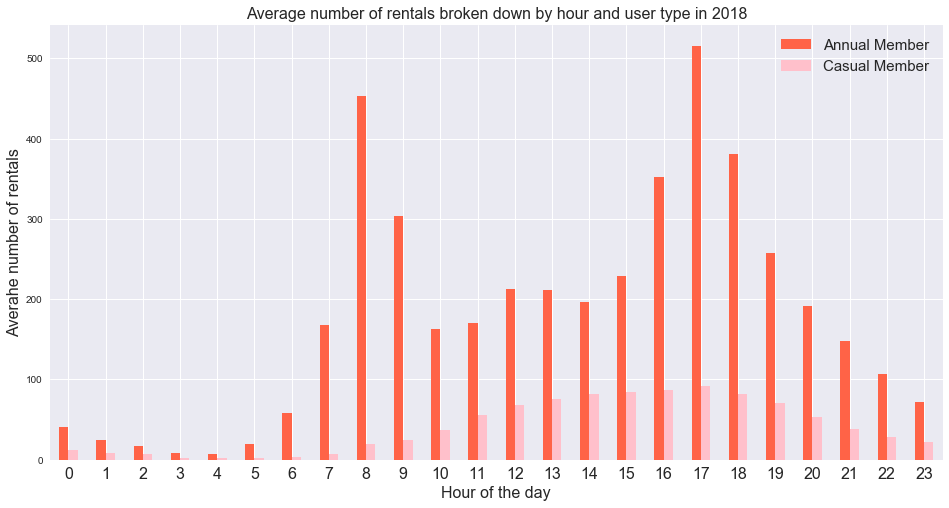

In [29]:
#creating groupby object that sums the average number of rides based on hour of the day 
rentals_by_hour = df.groupby(['hour', 'user_type'])['user_type'].count() / 365
rentals_by_hour.unstack().plot(kind='bar', figsize=(16,8), color=['tomato', 'pink'])

plt.title('Average number of rentals broken down by hour and user type in 2018',
          fontdict={'fontsize':16})
plt.xlabel('Hour of the day', fontdict={'fontsize':16})
plt.ylabel('Averahe number of rentals', fontdict={'fontsize':16})
plt.xticks(df['hour'].unique(), size=16, rotation=0)
plt.legend(loc='best', prop={'size':15})
plt.show()

The coclusion to use bikes primarily for work-related travels is also confirmed by the average number of bicycle rentals depending on the time of day. What is necessary to underline, the above conclusion can only be applied to users who regularly use bicycles.

It is obvious that there are more of them during the daytime, and not at nighttime, but a significant increase in the number of rentals in the morning (approx. 8) and in the afternoon (approx. 17) can be observed for annual members. Most sporadic users rent bikes during the day (11-22) - compared to regular users, there are no specific increases in rentals at a given hour. 

This information can be important from the perspective of planning the demand for bicycles and their hourly distribution.

# Bike stations

In order to properly plan the demand for bicycles, it is also important to know which locations are the most popular among users.

In [30]:
#creating pivot table that counts the total number of rides depending on their strarting station 
station_popularity = df.pivot_table(index='from_station_name', values='to_station_name', 
               aggfunc='count').sort_values('to_station_name', ascending=False)
station_popularity.index.name = 'Station'
station_popularity.columns = ['Most popular Bike Share stations by number of rentals in 2018']

#printing top-ten monst popular station in 2018
station_popularity.head(10)

,Most popular Bike Share stations by number of rentals in 2018
Station,
York St / Queens Quay W,24017
Bay St / Queens Quay W (Ferry Terminal),22743
Union Station,19869
Bay St / Wellesley St W,19184
Sherbourne St / Wellesley St E,19131
Front St W / Blue Jays Way,17282
Princess St / Adelaide St E,17089
Dundas St W / Yonge St,17054
Bay St / College St (East Side),16965


Currently analyzed data does not have information on the location of individual stations, but this is generally available information - downloading additional data may allow additional analysis.

In [31]:
#API source: https://open.toronto.ca/dataset/bike-share-toronto/ [10.02.2020]
import requests
import json
req = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')
stations = pd.DataFrame(data=json.loads(req.content)['data']['stations'])

#saving downloaded data for backup reasons
stations.to_csv('bike_stations_toronto.csv')

stat = stations[['station_id', 'lat', 'lon']]
stat = stat.set_index('station_id')

In [32]:
stat.head()

,lat,lon
station_id,,
7000,43.639832,-79.395954
7001,43.647992,-79.370907
7002,43.667333,-79.399429
7003,43.667158,-79.402761
7004,43.656518,-79.389099


In [33]:
#creating dictionary for easy changing data types
dtype = dict(from_station_id=str, to_station_id=str)

#adding new columns to the original dataset and changing their names to be more self-explanatory
df = pd.merge(df.astype(dtype), stat, how='left', left_on='from_station_id', 
         right_index=True)
df.rename({'lat' : 'from_latitude', 'lon' : 'from_longitude'}, axis=1, inplace=True)

#adding new columns to the original dataset and changing their names to be more self-explanatory
df = pd.merge(df.astype(dtype), stat, how='left', left_on='to_station_id', 
         right_index=True)
df.rename({'lat' : 'to_latitude', 'lon' : 'to_longitude'}, axis=1, inplace=True)

From the company’s management’s perspective, it may be important how far the average distance users travel. Based on this data, it is not possible to accurately calculate this, but it can be estimated in a diffrent way.

A function will be created that will first calculate the distance between two stations based on their geographical coordinates taking into account the curvature of the earth (although statistically it does not seem very important in the case of points that are so close together, only on the scale of the size of one city).
Then, bearing in mind that:
- it is impossible in most cases to drive in the city from point A to point B in a straight line; and
- Toronto, like most cities in North America, was built in a regular spatial arrangement of streets

the distance will be estimated based on the right-side lengths of the right-angled triangle having angles of 30 and 60 degrees.

In [34]:
#creating function that calculate distance based on Haversine formula
def get_distance(row):
    
    #Haversine formula require coordinates to be changed to radians
    row['from_longitude'] = math.radians(row['from_longitude'])
    row['from_latitude'] = math.radians(row['from_latitude'])
    row['to_longitude'] = math.radians(row['to_longitude'])
    row['to_latitude'] = math.radians(row['to_latitude'])
    
    dlon = row['to_longitude'] - row['from_longitude']
    dlat = row['to_latitude'] - row['from_latitude']
    
    a = math.sin(dlat/2)**2 + math.cos(row['from_latitude']) * \
     math.cos(row['to_latitude']) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    
    #Earth radius in kilomenetrs, so the returned result is also in kilometers
    r = 6371 
    straight_line = c * r #straight line between two stations

    return round(straight_line/2 + straight_line*np.sqrt(3)/2, 3)

In [35]:
#applying new function
df['distance'] = df.apply(func=get_distance, axis=1)
df[['from_station_name', 'to_station_name', 'distance']]

,from_station_name,to_station_name,distance
trip_id,,,
2383648,Bremner Blvd / Rees St,Bathurst St / Fort York Blvd,1.457
2383649,Ossington Ave / College St,Central Tech (Harbord St),1.979
2383650,Bay St / College St (West Side) - SMART,Bay St / Albert St,1.094
2383651,Queen St W / York St (City Hall),Phoebe St / Spadina Ave,1.384
2383652,University Ave / Elm St,Princess St / Adelaide St E,2.504
...,...,...,...
4581273,Danforth Ave / Coxwell Ave,Donlands Station,1.663
4581274,Bay St / Wellesley St W,Jarvis St / Isabella St,1.128
4581275,Phoebe St / Spadina Ave,Fort York Blvd / Capreol Ct,1.551


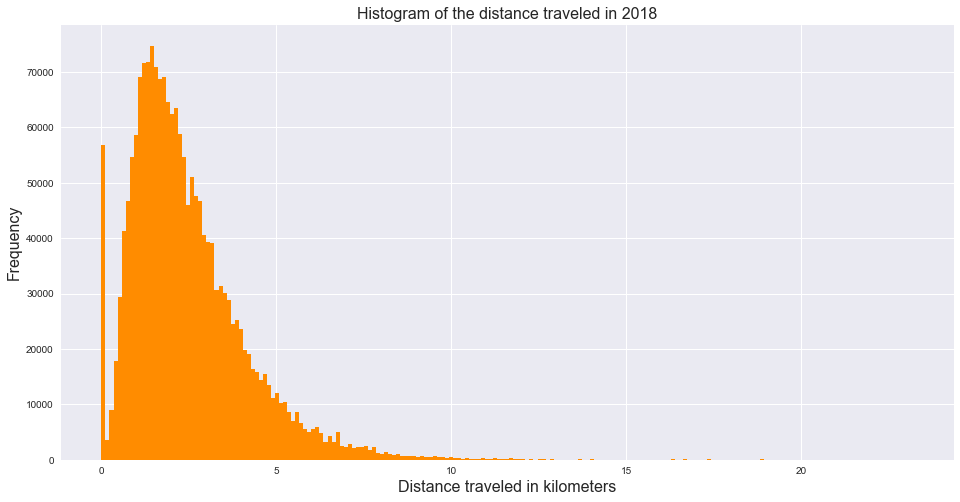

In [36]:
df['distance'].plot(kind='hist', bins=201, figsize=(16,8), color='darkorange')

plt.title('Histogram of the distance traveled in 2018',fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':16})
plt.xlabel('Distance traveled in kilometers', fontdict={'fontsize':16})
plt.show()

The largest number of trips in a straight line was less than 2 kilometers.

On the page from which the analyzed data was downloaded, there was a task to analyze how many of all trips are routes that beggins and ends at the same point. Based on the distance traveled, you can filter such a trip (distance covered - 0 kilometers). Although they do not constitute a large share among all journeys, they are clearly marked on the histogram.

Based on location data, it is now possible to plot locations on maps.


In [37]:
print('Only {0:.2%} of all rides ends in the same point where they begun.'.format(
df['distance'].value_counts()[0] / df['distance'].value_counts().sum()))

Only 2.97% of all rides ends in the same point where they begun.


The main goal is to show the popularity of each stations on the map.


In [38]:
#calculating popularity of all stations
map1 = df['from_station_id'].value_counts()
map2 = df['to_station_id'].value_counts()

#merging popularity of stations with their coorinates
map1 = pd.merge(map1, stat, how='left', left_index=True, right_index=True)
map2 = pd.merge(map2, stat, how='left', left_index=True, right_index=True)

First, a map will be created, showing the locations of individual stations on the Toronto map. 

In [39]:
#creating bounds for the map
bounds = (df['to_longitude'].min(), df['to_longitude'].max(), 
          df['to_latitude'].min(), df['to_latitude'].max())

print('Minimum longitude: {},\nMaximum longitude: {}\n\
      \nMinimum latitude: {},\nMaximum latitude: {}'
      .format(bounds[0], bounds[1], bounds[2], bounds[3]))

Minimum longitude: -79.480284,
Maximum longitude: -79.281455
      
Minimum latitude: 43.6224434,
Maximum latitude: 43.7112153


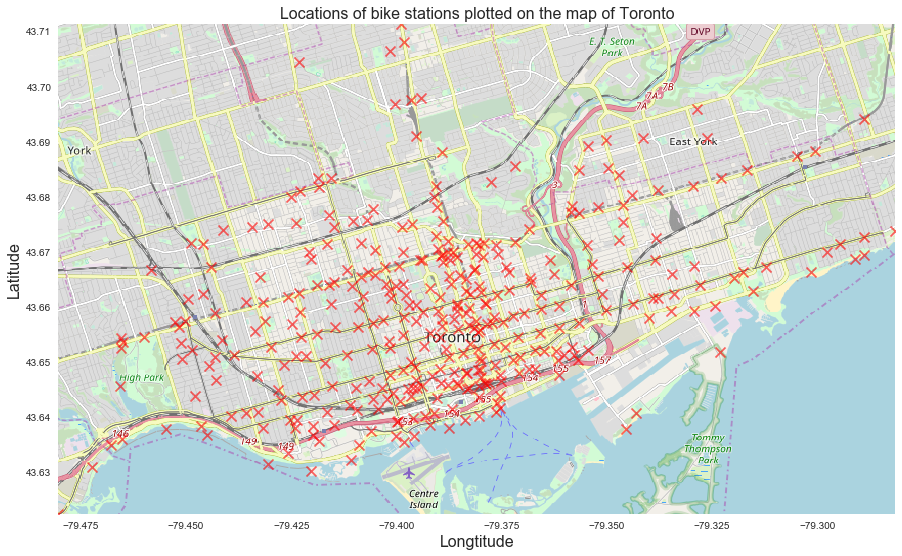

In [40]:
#map was manually downloaded from https://www.openstreetmap.org [10.02.2020]
toronto_map = plt.imread('toronto_map.png')

plt.figure(figsize=(15,9))
plt.scatter(map1['lon'], map1['lat'], c='red', alpha=0.6, zorder=1, marker='x', s=100)

plt.title('Locations of bike stations plotted on the map of Toronto',fontdict={'fontsize':16})
plt.ylabel('Latitude', fontdict={'fontsize':16})
plt.xlabel('Longtitude', fontdict={'fontsize':16})

plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[2], bounds[3])
plt.imshow(toronto_map, zorder=0, extent=bounds, aspect='auto')
plt.grid()
plt.show()

It can be seen that the lion's share of the station is located in the city center and on the main streets.

For better transparency of the presented data, in the next steps of this analysis, the locations and their values will be presented on a scatterplot, without actual Toronto map.

Next, a map (scatterplot) on which the most used stations will be marked in terms of the number of bike rentals and returns will be created.

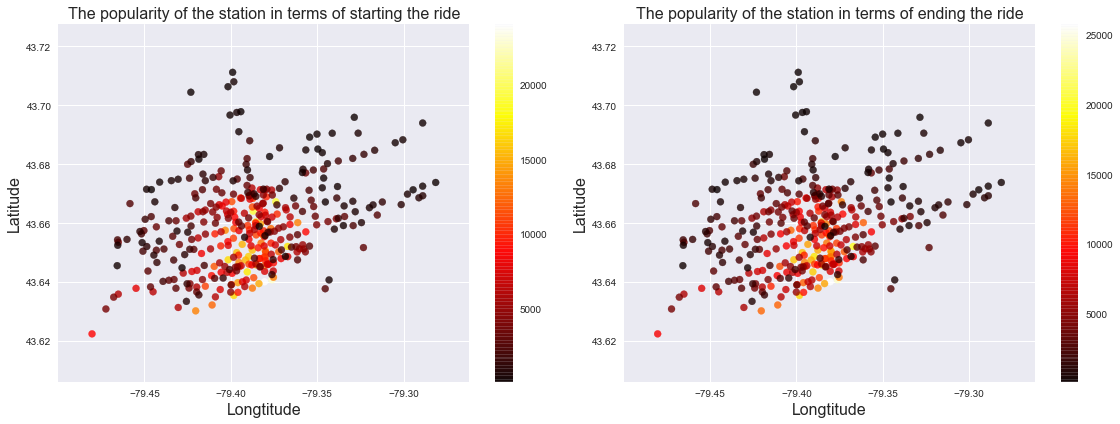

In [41]:
#plotting map no. 1
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(map1['lon'], map1['lat'], c=map1['from_station_id'], cmap='hot', alpha=0.8)
plt.colorbar()
plt.title('The popularity of the station in terms of starting the ride',fontdict={'fontsize':16})
plt.ylabel('Latitude', fontdict={'fontsize':16})
plt.xlabel('Longtitude', fontdict={'fontsize':16})

#plotting map no. 2
plt.subplot(122)
plt.scatter( map2['lon'], map2['lat'], c=map2['to_station_id'], cmap='hot', alpha=0.8)
plt.colorbar()
plt.title('The popularity of the station in terms of ending the ride',fontdict={'fontsize':16})
plt.ylabel('Latitude', fontdict={'fontsize':16})
plt.xlabel('Longtitude', fontdict={'fontsize':16})
plt.tight_layout()

The above maps show no significant differences between the number of rentals and returns at a given station.

The same will be analyzed based on the morning and afternoon hours - as suggested by the histogram of rentals divided into individual hours. In order to eliminate winter and night, only the May-October period will be taken into account.

In [42]:
#crating popularity values and merging with coordinates for morning hours
morning1 = df[(df['hour'] >= 6) & (df['hour'] <= 10)]['from_station_id'].value_counts()
morning2 = df[(df['hour'] >= 6) & (df['hour'] <= 10)]['to_station_id'].value_counts()
morning1 = pd.merge(morning1, stat, how='left', left_index=True, right_index=True)
morning2 = pd.merge(morning2, stat, how='left', left_index=True, right_index=True)

#crating popularity values and merging with coordinates for afternoon hours
afternoon1 = df[(df['hour'] >= 15) & (df['hour'] <= 19)]['from_station_id'].value_counts()
afternoon2 = df[(df['hour'] >= 15) & (df['hour'] <= 19)]['to_station_id'].value_counts()
afternoon1 = pd.merge(afternoon1, stat, how='left', left_index=True, right_index=True)
afternoon2 = pd.merge(afternoon2, stat, how='left', left_index=True, right_index=True)

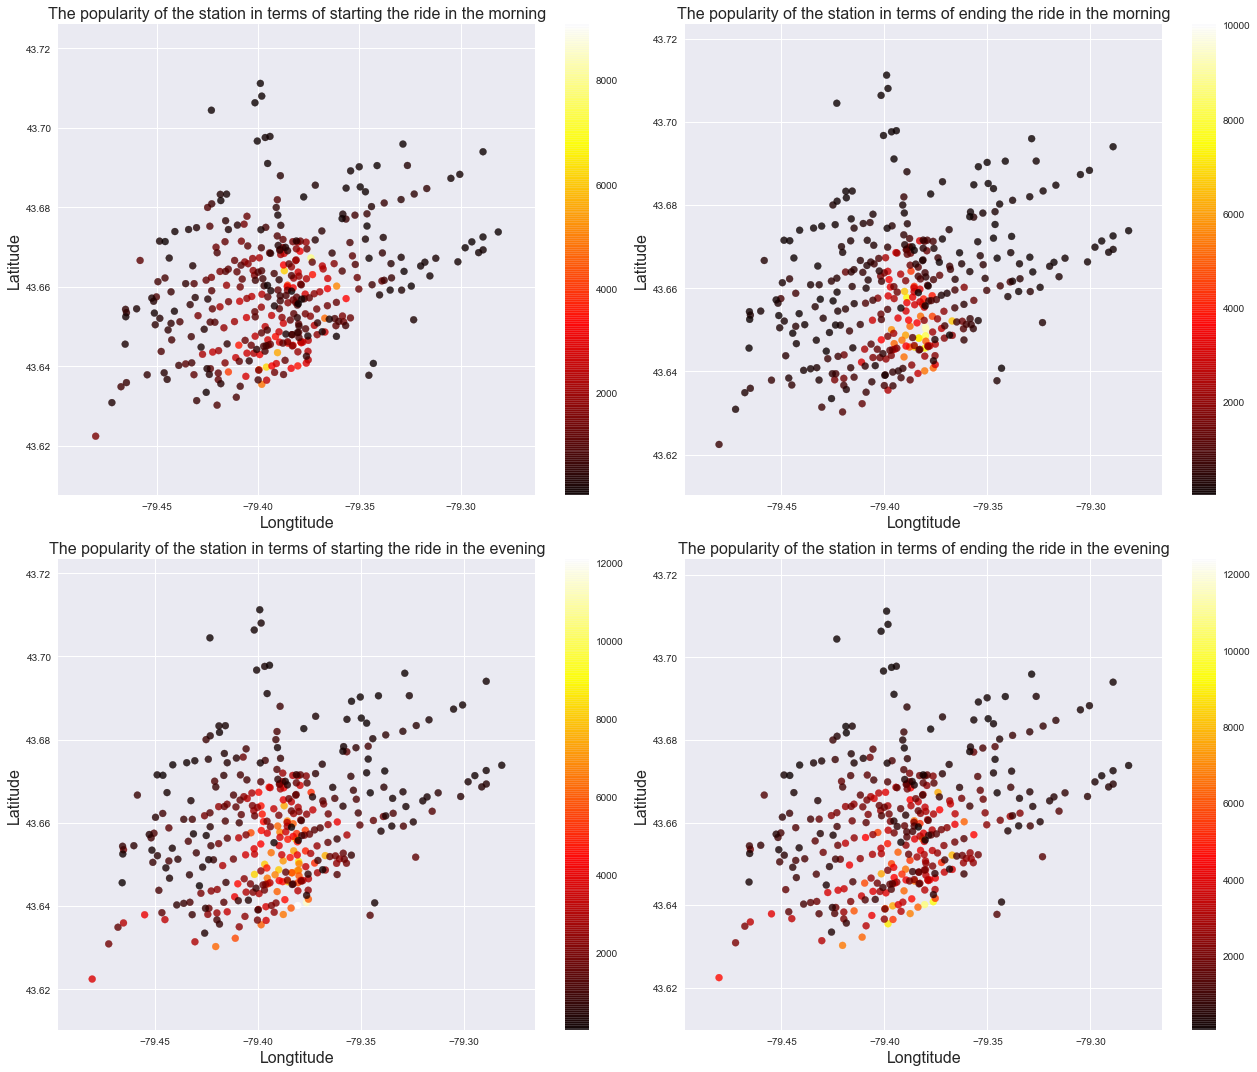

In [43]:
plt.figure(figsize=(18,15))
subplot = 221
titles = ['The popularity of the station in terms of starting the ride in the morning',
          'The popularity of the station in terms of ending the ride in the morning',
          'The popularity of the station in terms of starting the ride in the evening',
          'The popularity of the station in terms of ending the ride in the evening']
data = [(morning1['lon'], morning1['lat']), (morning2['lon'], morning2['lat']),
        (afternoon1['lon'], afternoon1['lat']), (afternoon2['lon'], afternoon2['lat'])]
colors = [morning1['from_station_id'], morning2['to_station_id'],
          afternoon1['from_station_id'], afternoon2['to_station_id']]
        
for i in range(4):
    plt.subplot(subplot)
    subplot += 1
    plt.scatter(data[i][0], data[i][1], c=colors[i], cmap='hot', alpha=0.8)
    plt.colorbar()
    plt.title(titles[i], fontdict={'fontsize':16})
    plt.ylabel('Latitude', fontdict={'fontsize':16})
    plt.xlabel('Longtitude', fontdict={'fontsize':16})
    plt.tight_layout()

In this case, the differences are much more significant - it can be seen that in the morning hours bike returns occur in a larger number in the central part of the city. In the afternoon hours the tendency seems to be the opposite - more bikes are rented in the center.

# Number of simultaneous rentals

Another issue is the analysis of the number of bikes available. The above analysis has so far concerned the number of rentals, which is limited by their availability.

In [44]:
#calculating how many rides are active at the same time 
active_rides = df[['trip_start_time', 'trip_stop_time']].melt(
    var_name='tag', value_name='datetime').sort_values('datetime')

active_rides['counter'] = active_rides['tag'].map({'trip_start_time' : 1, 
                                                   'trip_stop_time' : -1}).cumsum()
active_rides.set_index('datetime', inplace=True)

In [45]:
active_rides.head()

,tag,counter
datetime,,
2018-01-01 00:47:00,trip_start_time,1
2018-01-01 00:52:00,trip_start_time,2
2018-01-01 00:54:00,trip_stop_time,1
2018-01-01 00:55:00,trip_start_time,2
2018-01-01 00:57:00,trip_start_time,3


In [46]:
#the maximum number of active rentals at the same time was 621
active_rides['counter'].sort_values(ascending=False).head(5)

datetime
2018-05-21 16:47:00    621
2018-05-21 16:47:00    621
2018-05-21 16:47:00    620
2018-05-21 15:29:00    620
2018-05-21 16:47:00    620
Name: counter, dtype: int64

As can be seen from the table, the largest number of concurrent bicycle users was around 620. However, it is difficult to determine whether all the available bikes were used at that time.

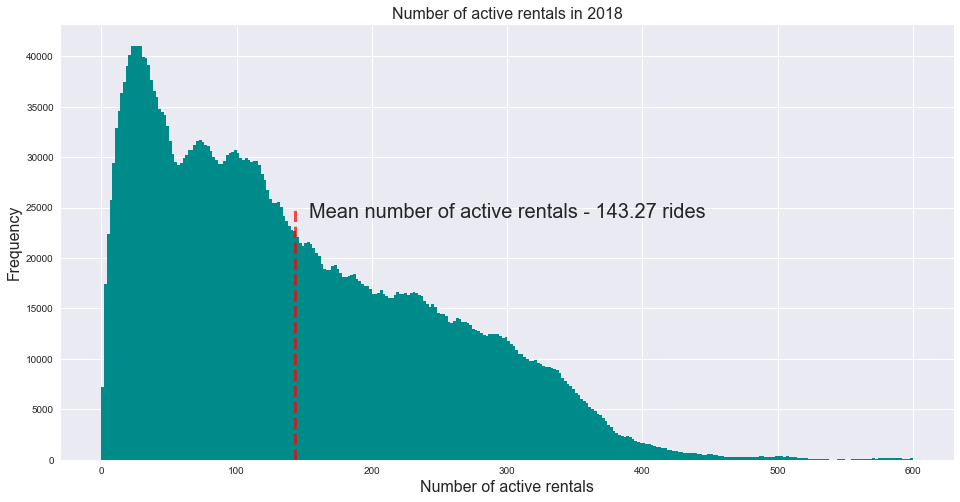

In [47]:
mean_active = active_rides['counter'].mean()

bins = np.linspace(0, 600, 301)

plt.figure(figsize=(16,8))
plt.hist(active_rides['counter'], bins, color='darkcyan')

plt.plot([mean_active, mean_active], [0, 25000], 'r--', lw=3, alpha=0.7)
plt.annotate('Mean number of active rentals - {} rides'
             .format(round(mean_active, 2)), xy=(mean_active+10,24000), size=20)

plt.title('Number of active rentals in 2018',
          fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':16})
plt.xlabel('Number of active rentals', fontdict={'fontsize':16})
plt.show()

However the histogram shows, that the maximum number of 620 rented bikes at the same time was very rare. About 30 bikes were mainly rented. The above data were constructed on the basis of comprehensive data, i.e. including winter and night time.

In [48]:
#creating filter of May-October days
summer_filter1 = active_rides.index > '2018-05-01'
summer_filter2 = active_rides.index < '2018-11-01'

In [49]:
#filtering only May-October days and 7-21 hours
summer_days = active_rides[summer_filter1&summer_filter2].between_time('07:00:00', '21:00:00')

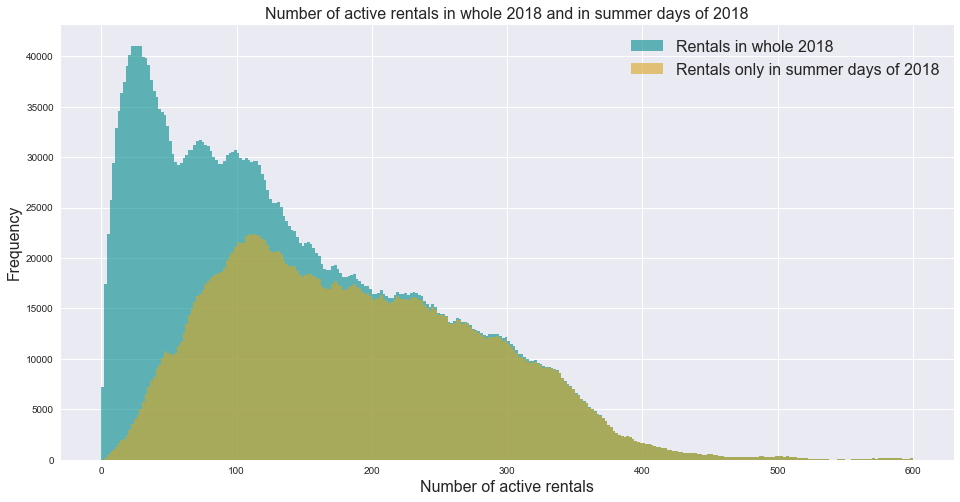

In [50]:
bins = np.linspace(0, 600, 301)

plt.figure(figsize=(16,8))
plt.hist(active_rides['counter'], bins, alpha=0.6, label='Rentals in whole 2018', color='darkcyan')
plt.hist(summer_days['counter'], bins, alpha=0.6, label='Rentals only in summer days of 2018', 
         color='goldenrod')

plt.legend(fontsize=16)
plt.title('Number of active rentals in whole 2018 and in summer days of 2018',
          fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':16})
plt.xlabel('Number of active rentals', fontdict={'fontsize':16})
plt.show()

While showing the previous graph with the histogram created solely on the basis of the summer season and daytime hours, it can be noticed that about 100 bikes are used at the same time. Considering the above, one should ask the question whether it is in the interest of the company to increase the number of available bicycles, if in given circumstances there are not so many people willing to rent them.

# Weather / correlation

One may wonder what factors most affect the number of bike rentals. As an example, the correlation of their numbers with temperature will be examined.

In [51]:
#source: https://toronto.weatherstats.ca/download.html [10.02.2020]
weather = pd.read_csv('toronto_weather.csv',
    usecols=['date_time_local', 'temperature', 'relative_humidity', 'wind_speed', 'visibility'])

In [52]:
#removing timezone infos that raise warnings, but are irrelevant in this - single city - case
weather['date_time_local'] = weather['date_time_local'].str.replace('EST', '')
weather['date_time_local'] = weather['date_time_local'].str.replace('EDT', '')

weather['date_time_local'] = weather['date_time_local'].astype('datetime64[ns]')

In [53]:
#changing dtype to datetime and creating filtering only 2018
filtr1 = weather['date_time_local'] <= '2019-01-01'
filtr2 = weather['date_time_local'] >= '2018-01-01'

weather.drop(weather[~(filtr1 & filtr2)].index, inplace=True)
weather = weather.sort_values('date_time_local').set_index('date_time_local')

In [54]:
weather.head()

,wind_speed,relative_humidity,temperature,visibility
date_time_local,,,,
2018-01-01 00:00:00,9.0,67.0,-19.5,24100.0
2018-01-01 01:00:00,12.0,71.0,-21.7,24100.0
2018-01-01 02:00:00,9.0,73.0,-19.3,24100.0
2018-01-01 03:00:00,4.0,73.0,-20.3,24100.0
2018-01-01 04:00:00,4.0,75.0,-19.9,24100.0


In [55]:
#changing index of previously created daily rental data to match 
#with format used in weather table
daily_rentals.index = daily_bins[:-1]

In [56]:
#calculating average daily weather and changing index to match the one in daily_rentals
daily_weather = weather.groupby(pd.cut(weather.index, daily_bins,
                                  right=False)).mean()
daily_weather.index = daily_bins[:-1]

In [57]:
daily_weather = pd.merge(daily_rentals, daily_weather, 
                         left_index=True, right_index=True, how='left')
daily_weather.rename({'user_type' : 'rentals'}, axis=1, inplace=True)

In [58]:
daily_weather.corr()['rentals']

rentals              1.000000
wind_speed          -0.293160
relative_humidity   -0.227071
temperature          0.884130
visibility           0.416395
Name: rentals, dtype: float64

As can be seen in table above, on the granularity level of single days (through whole 2018) temperature has the biggest correlation coefficient with number of rentals. 

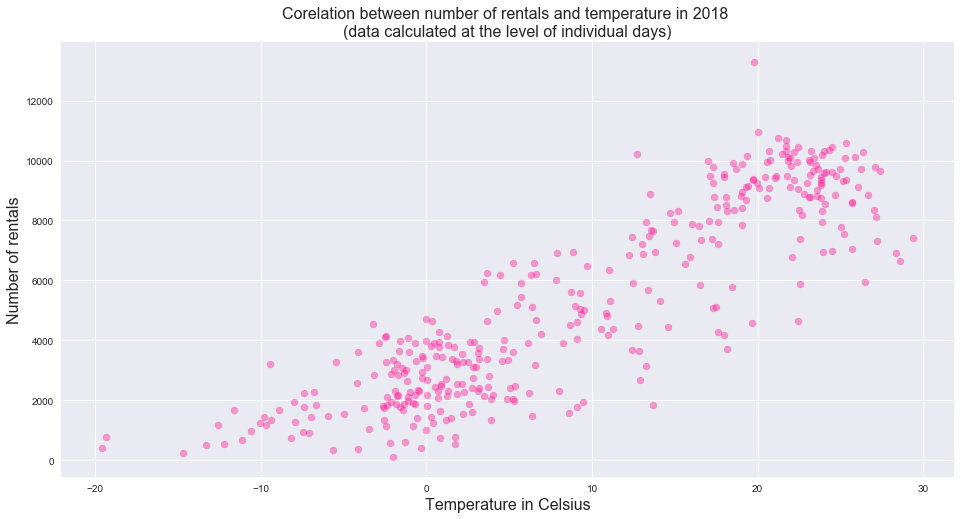

In [59]:
plt.figure(figsize=(16,8))
plt.scatter(daily_weather['temperature'], daily_weather['rentals'], alpha=0.4, color='deeppink')
plt.title('Corelation between number of rentals and temperature in 2018 \n(data calculated at the level of individual days)',
          fontdict={'fontsize':16})
plt.ylabel('Number of rentals', fontdict={'fontsize':16})
plt.xlabel('Temperature in Celsius', fontdict={'fontsize':16})
plt.show()                                                            

It should be taken into account that the above correlation is based on daily data, i.e. the sum of rentals for each day and the average daily temperature. The correlation in this case came out relatively high, because in winter, when the temperature is negative, rentals are much rarer.

Another issue is to examine the correlation in a shorter period. Next correlation will be examined only in the spring-summer period and excluding night hours.

In [60]:
#creating hourly bins to cut and group data 
hourly_bins = pd.date_range('2018-05-01', '2018-11-01', freq='H')

hourly_rentals = df.groupby(pd.cut(df['trip_start_time'], hourly_bins, 
                                  right=False))['user_type'].count()

hourly_rentals.index = hourly_bins[:-1]

In [61]:
hourly_rentals = hourly_rentals[(hourly_rentals.index.hour > 6) & (hourly_rentals.index.hour < 22)]

In [62]:
weather = pd.merge(hourly_rentals, weather, left_index=True, right_index=True, how='left')
weather.rename({'user_type' : 'rentals'}, axis=1, inplace=True)

In [63]:
weather.corr()['rentals']

rentals              1.000000
wind_speed           0.070537
relative_humidity   -0.273687
temperature          0.372588
visibility           0.240221
Name: rentals, dtype: float64

The correlation of number of rentals with temperature is not clear: 0.372588.

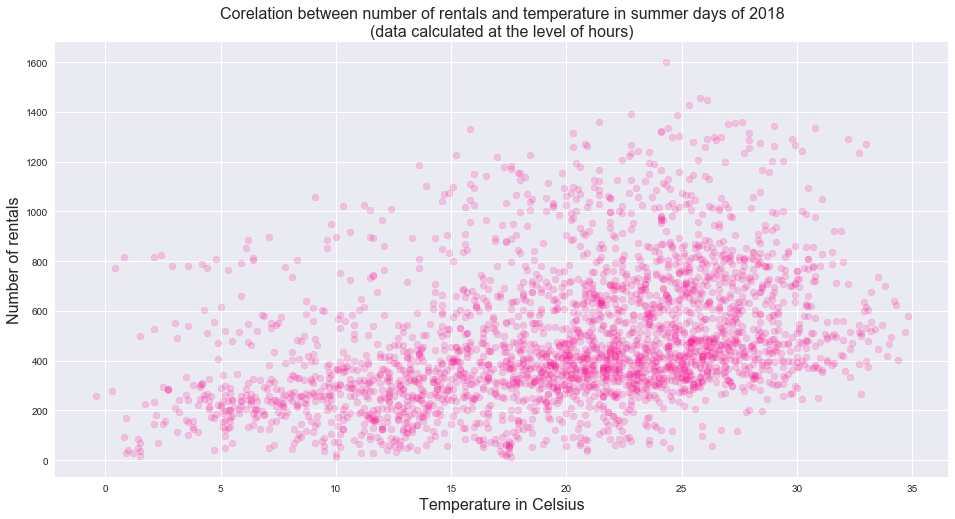

In [64]:
plt.figure(figsize=(16,8))
plt.scatter(weather['temperature'], weather['rentals'], alpha=0.2, color='deeppink')
plt.title('Corelation between number of rentals and temperature in summer days of 2018\n(data calculated at the level of hours)',
          fontdict={'fontsize':16})
plt.ylabel('Number of rentals', fontdict={'fontsize':16})
plt.xlabel('Temperature in Celsius', fontdict={'fontsize':16})
plt.show()

As can been seen on corelation graph above, there is no straight correlation line, hence correlation between temperature and number of rentals exist, but is not very strong. One should look for other, external reasons for changes of number of rental throughout the year.

# Thank you very much! :)